In [2]:
!pip install pandas


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SK

In [5]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [6]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SK

In [7]:
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
df = pd.read_csv("nasdaq100.csv" , sep=';')

In [9]:
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


df.isnull().sum()

In [10]:
df = df.drop(columns = ['Date'])
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'NasDaq100 Stock Price')

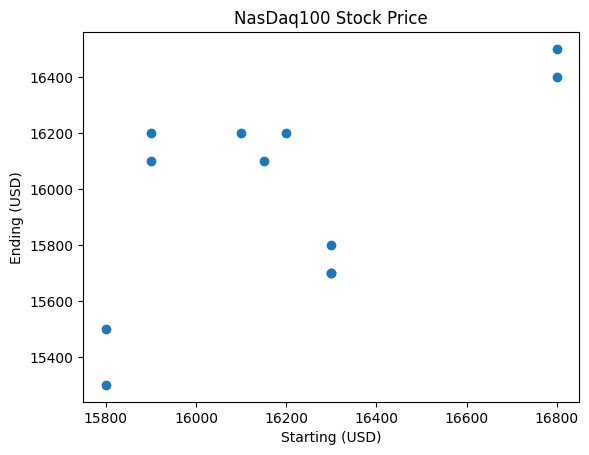

In [11]:
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NasDaq100 Stock Price')

In [12]:
x = df.drop('Ending (USD)', axis=1)
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [13]:
y = df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()

In [16]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [17]:
y.mean()

Ending (USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'NasDaq100 Stock Price')

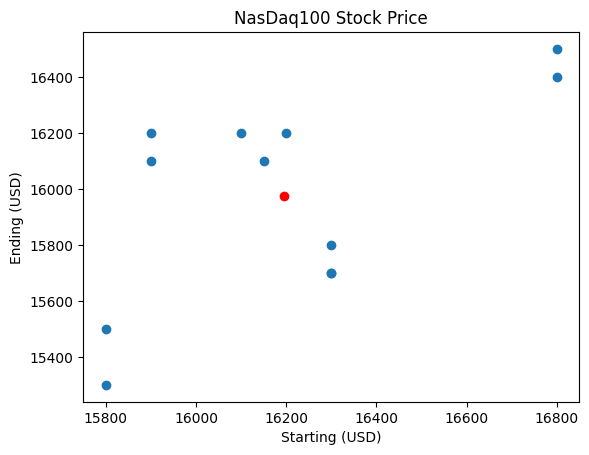

In [18]:
plt.scatter(x.mean(), y.mean(), color='red')

plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NasDaq100 Stock Price')

In [19]:
reg.fit(x, y)

LinearRegression()

In [20]:
m = reg.coef_
m

array([[0.65258293]])

In [21]:
c = reg.intercept_
c

array([5405.87555702])

In [22]:
m * 16700 + c

array([[16304.0105628]])

In [23]:
reg.predict([[16700]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [24]:
df['Predicted_y'] = reg.predict(x)
df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0.5, 1.0, 'NasDaq100 Stock Price')

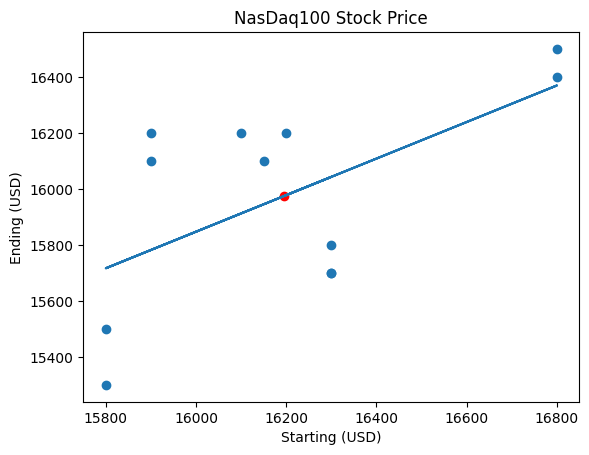

In [25]:
plt.plot(x, reg.predict(x))

plt.scatter(x.mean(), y.mean(), color='red')

plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NasDaq100 Stock Price')

In [26]:
reg.predict([[16200]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[15977.71909556]])

In [27]:
df['loss'] = df['Ending (USD)'] - df['Predicted_y']
df.head()

,Starting (USD),Ending (USD),Predicted_y,loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
mse = mean_squared_error(df['Ending (USD)'], df['Predicted_y'])
mse

80411.23397700385

In [30]:
mae = mean_absolute_error(df['Ending (USD)'], df['Predicted_y'])
mae

260.3840017604666

In [31]:
abs(df['loss'])

0     130.731144
1     318.055785
2     416.685922
3     287.539198
4     342.977389
5      30.731144
6     418.055785
7     216.685922
8     154.910051
9     242.977389
10    222.280904
11    342.977389
Name: loss, dtype: float64

In [32]:
sum(abs(df['loss'])) / len(x)

260.3840017604666

In [33]:
reg.score(x, y)

0.3577804940272571

Text(0.5, 1.0, 'NasDaq100 Stock Price')

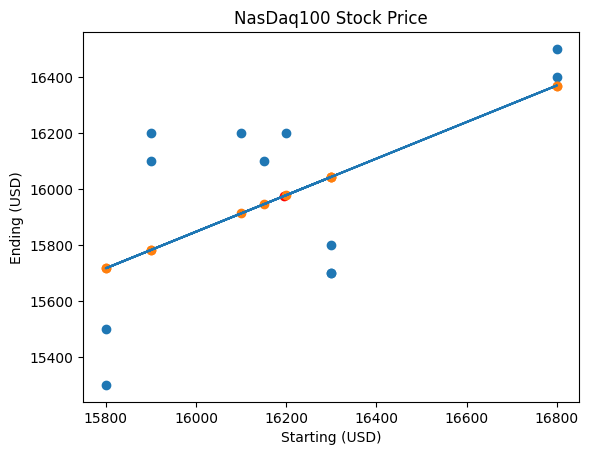

In [34]:
plt.plot(x, reg.predict(x))

plt.scatter(x.mean(), y.mean(), color='red')

plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.scatter(df['Starting (USD)'], reg.predict(x))
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NasDaq100 Stock Price')

In [35]:
from sklearn.metrics import r2_score
r2_score(y, reg.predict(x))

0.3577804940272571